In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pywt
import timeit
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from scipy import signal
from keras.layers import Dense, Flatten, Activation, TimeDistributed
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import AveragePooling1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalAveragePooling1D
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, Nadam
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
import keras.callbacks
from keras import initializers, regularizers
from keras.layers.pooling import GlobalAvgPool2D
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import LeakyReLU, PReLU

Using TensorFlow backend.


In [2]:
np.random.seed(42)
dataset = sio.loadmat('dataset_1.mat')
heart_rate = dataset['heart_rate']
heart_rate = (heart_rate - 50) / 150
ss = np.zeros((3203, 1000, 1))
signal = dataset['signal']
ss[:, :, 0] = signal
print(ss.shape)
print(heart_rate.shape)

(3203, 1000, 1)
(3203, 1)


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(ss, heart_rate, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2562, 1000, 1)
(641, 1000, 1)
(2562, 1)
(641, 1)


In [4]:
# network design
model = Sequential()
# first part
model.add(Conv1D(64, 16, padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
# second part
model.add(Conv1D(64, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 16, padding='same'))
model.add(MaxPooling1D())
# third layers
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(64, 16, padding='same'))
model.add(MaxPooling1D())

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 16, padding='same'))
model.add(MaxPooling1D())

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 16, padding='same'))
model.add(MaxPooling1D())

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(192, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(192, 16, padding='same'))
model.add(MaxPooling1D())

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(192, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(192, 16, padding='same'))
model.add(MaxPooling1D())

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(256, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(256, 16, padding='same'))
model.add(MaxPooling1D())

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(256, 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(256, 16, padding='same'))
model.add(MaxPooling1D())
##
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Flatten())
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

#model.summary()

In [5]:
# optimization setup
optm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=3*10**(-4))
sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)
model.compile(
    loss='mae',
    optimizer=optm,
    metrics=['mse'])

In [6]:
filepath="weights.best1.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mean_squared_error', mode='auto', verbose=1, save_best_only=True)
callbacks_list = [checkpoint]

In [7]:
# training
model.fit(
    X_train, 
    Y_train,
    batch_size=128,
    epochs=3000,
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks_list,
    verbose=2)

Train on 2049 samples, validate on 513 samples
Epoch 1/3000
 - 8s - loss: 0.1621 - mean_squared_error: 0.0389 - val_loss: 0.1577 - val_mean_squared_error: 0.0361

Epoch 00001: val_mean_squared_error improved from inf to 0.03610, saving model to weights.best1.hdf5
Epoch 2/3000
 - 2s - loss: 0.1610 - mean_squared_error: 0.0378 - val_loss: 0.1553 - val_mean_squared_error: 0.0354

Epoch 00002: val_mean_squared_error improved from 0.03610 to 0.03536, saving model to weights.best1.hdf5
Epoch 3/3000
 - 2s - loss: 0.1605 - mean_squared_error: 0.0393 - val_loss: 0.1508 - val_mean_squared_error: 0.0344

Epoch 00003: val_mean_squared_error improved from 0.03536 to 0.03444, saving model to weights.best1.hdf5
Epoch 4/3000
 - 2s - loss: 0.1601 - mean_squared_error: 0.0385 - val_loss: 0.1497 - val_mean_squared_error: 0.0340

Epoch 00004: val_mean_squared_error improved from 0.03444 to 0.03396, saving model to weights.best1.hdf5
Epoch 5/3000
 - 2s - loss: 0.1590 - mean_squared_error: 0.0368 - val_loss

The avarage predict error:  2.14496392262
The mean squared error: 36.8344159079


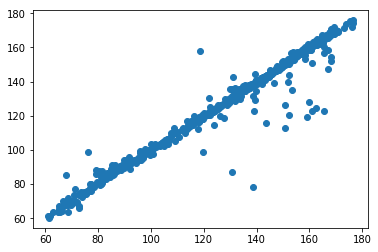

In [8]:
Y_pred = model.predict(X_test)
Y_test = Y_test * 150 + 50
Y_pred = Y_pred * 150 + 50
plt.figure
plt.scatter(Y_test, Y_pred)
Y_error = abs(Y_pred - Y_test)
print('The avarage predict error: ', np.mean(Y_error))
print('The mean squared error:', metrics.mean_squared_error(Y_test, Y_pred))

The avarage predict error:  0.962058606872
The mean squared error: 10.4492332958


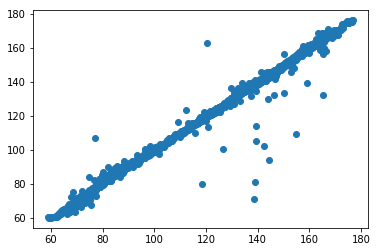

In [9]:
Y_pred = model.predict(X_train)
Y_train = Y_train * 150 + 50
Y_pred = Y_pred * 150 + 50
plt.figure
plt.scatter(Y_train, Y_pred)
Y_error = abs(Y_pred - Y_train)
print('The avarage predict error: ', np.mean(Y_error))
print('The mean squared error:', metrics.mean_squared_error(Y_train, Y_pred))

In [10]:
# Using the best model
model.load_weights("weights.best1.hdf5")

The avarage predict error:  1.5141794485
The mean squared error: 11.9097365741


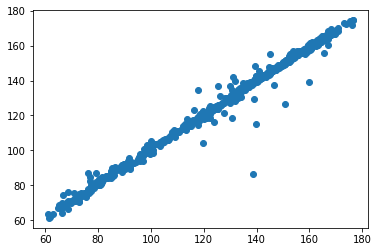

In [11]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred * 150 + 50
plt.figure
plt.scatter(Y_test, Y_pred)
Y_error = abs(Y_pred - Y_test)
print('The avarage predict error: ', np.mean(Y_error))
print('The mean squared error:', metrics.mean_squared_error(Y_test, Y_pred))

The avarage predict error:  0.815570679201
The mean squared error: 2.45602250998


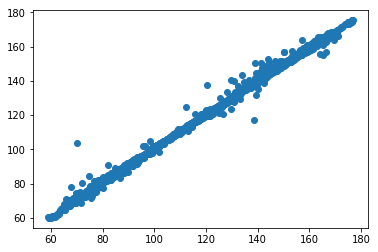

In [12]:
Y_pred = model.predict(X_train)
#Y_train = Y_train * 150 + 50
Y_pred = Y_pred * 150 + 50
plt.figure
plt.scatter(Y_train, Y_pred)
Y_error = abs(Y_pred - Y_train)
print('The avarage predict error: ', np.mean(Y_error))
print('The mean squared error:', metrics.mean_squared_error(Y_train, Y_pred))